### Ejercicio de Regresión Logística en Python

En este proyecto, trabajaremos con un conjunto de datos publicitarios, que indica si un usuario de Internet en particular hizo clic o no en un anuncio en el sitio web de una empresa. Intentaremos crear un modelo que prediga si harán clic o no en un anuncio en función de las características de ese usuario.

Este conjunto de datos contiene las siguientes características:

* 'Tiempo diario empleado en el sitio' (Daily Time Spent on Site): tiempo del consumidor en el sitio en minutos
* 'Edad' (Age): edad del cliente en años
* 'Ingresos del área' (Area Income): Prom. Ingresos del área geográfica del consumidor
* 'Uso diario de Internet' (Daily Internet Usage): Prom. minutos al día el consumidor está en internet
* 'Línea de tema del anuncio'(Ad Topic Line): título del anuncio
* 'Ciudad' (City): ciudad del consumidor
* 'Hombre' (Male): si el consumidor era o no hombre
* 'País' (Country): país del consumidor
* 'Marca de tiempo' (Timestamp): hora en que el consumidor hizo clic en el anuncio o en la ventana cerrada
* 'Haga clic en el anuncio' (Clicked on Ad): 0 o 1 indicaron hacer clic en el anuncio

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import os
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# Creamos variables para su posterior uso en la importación de la base
path = "D:\Briam\Clases\Python For Data Science\Data".replace("\\","/")
name = "advertising.csv"

In [ ]:
# Importamos la base
df = pd.read_csv(path+"/"+name, sep = ",", header = 0, encoding = "ISO-8859-1")
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


In [ ]:
df_pre = df.copy()

In [ ]:
# Armando una data desbalanceada
df_pre_1 = df_pre[df_pre["Clicked on Ad"] == 0]
df_pre_2 = df_pre[df_pre["Clicked on Ad"] == 1].sample(100)
df_pre_new = pd.concat([df_pre_1,df_pre_2],axis = 0).reset_index(drop = True)
df_pre_new

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0
...,...,...,...,...,...,...,...,...,...,...
595,49.96,55,60968.62,151.94,Multi-layered user-facing parallelism,South Cynthiashire,1,Zambia,2016-04-04 00:02:20,1
596,62.20,25,25408.21,161.16,Cross-platform multimedia algorithm,New Lindaberg,0,Liechtenstein,2016-04-24 13:42:15,1
597,56.14,38,32689.04,113.53,Devolved tangible approach,Lake Edward,1,Ireland,2016-02-03 07:59:16,1
598,54.43,37,75180.20,154.74,Balanced contextually-based pricing structure,Williamsmouth,1,Luxembourg,2016-05-31 09:06:29,1


In [ ]:
# Notamos que la variable best_server tiene una cantidad significativa de valores nulos
df_pre_new.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Daily Time Spent on Site  600 non-null    float64
 1   Age                       600 non-null    int64  
 2   Area Income               600 non-null    float64
 3   Daily Internet Usage      600 non-null    float64
 4   Ad Topic Line             600 non-null    object 
 5   City                      600 non-null    object 
 6   Male                      600 non-null    int64  
 7   Country                   600 non-null    object 
 8   Timestamp                 600 non-null    object 
 9   Clicked on Ad             600 non-null    int64  
dtypes: float64(3), int64(3), object(4)
memory usage: 47.0+ KB


In [ ]:
"""Intuimos que las variables Ad Topic Line, City, Country y Timestamp no influyen en la decisión de
dar click al anuncio """
df_pre_new = df_pre_new.drop(columns = ["Ad Topic Line","City","Country","Timestamp"])
df_pre_new.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [ ]:
# La data está desbalanceada
pd.value_counts(df_pre_new["Clicked on Ad"])/len(df_pre_new)

Clicked on Ad
0    0.833333
1    0.166667
Name: count, dtype: float64

In [ ]:
""" Debido a que la correlación entre las variables independientes son menores a 70, éstas pueden
ser usadas en el modelo """
df_pre_new.drop(columns = ["Clicked on Ad"]).corr("pearson")

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male
Daily Time Spent on Site,1.000000,-0.213497,0.169062,0.459667,0.007249
Age,-0.213497,1.000000,-0.016389,-0.238031,-0.055871
Area Income,0.169062,-0.016389,1.000000,0.221334,-0.060695
Daily Internet Usage,0.459667,-0.238031,0.221334,1.000000,0.037151
Male,0.007249,-0.055871,-0.060695,0.037151,1.000000


In [ ]:
# Escalamos a las variables numéricas
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [ ]:
df_pre_escalado = scaler.fit_transform(df_pre_new)
df_pre_escalado = pd.DataFrame(df_pre_escalado, columns = df_pre_new.columns)
df_pre_escalado

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,0.615858,0.390244,0.723715,0.932505,0.0,0.0
1,0.808612,0.292683,0.827147,0.547314,1.0,0.0
2,0.624744,0.170732,0.691659,0.811422,0.0,0.0
3,0.704716,0.243902,0.613712,0.869460,1.0,0.0
4,0.605947,0.390244,0.912426,0.743927,0.0,0.0
...,...,...,...,...,...,...
595,0.291353,0.878049,0.710171,0.288769,1.0,1.0
596,0.500513,0.146341,0.153552,0.345757,0.0,1.0
597,0.396958,0.463415,0.267517,0.051363,1.0,1.0
598,0.367738,0.439024,0.932621,0.306076,1.0,1.0


In [ ]:
# Seleccionamos nuestras variables predictoras y target
x = df_pre_new.drop(columns = ["Clicked on Ad"])
y = df_pre_new["Clicked on Ad"]

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
# Separamos la data en train y test
x_train,x_test,y_train,y_test = train_test_split(x, y, test_size = 0.2, random_state = 1)

In [ ]:
# Ajustamos el modelo de Regresión Logística
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

LogisticRegression()

<Axes: xlabel='Clicked on Ad'>

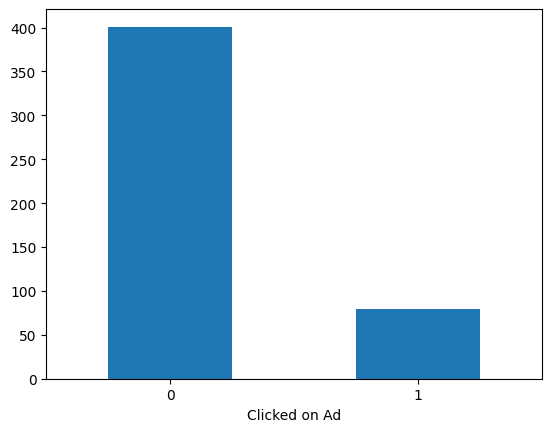

In [ ]:
# Graficamos las frecuencias de las clases del target
pd.value_counts(y_train).plot(kind = "bar", rot = 0)

In [ ]:
import statsmodels.api as sm
logit = sm.Logit(y_train,x_train)
model =logit.fit()
model.summary2()

Optimization terminated successfully.
         Current function value: 0.148699
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Method:             MLE       
Dependent Variable:    Clicked on Ad      Pseudo R-squared:   0.667     
Date:                  2023-12-03 13:23   AIC:                152.7510  
No. Observations:      480                BIC:                173.6200  
Df Model:              4                  Log-Likelihood:     -71.376   
Df Residuals:          475                LL-Null:            -214.65   
Converged:             1.0000             LLR p-value:        8.6066e-61
No. Iterations:        8.0000             Scale:              1.0000    
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Daily Time Spent on Site -0.0485   0.0152 -3.1975 0.0014 -0.0782 -0.0188
Age                       0.2891   0.0355  8.1379 0.0000  0.2195  0.3587
Area Income              -0.0000   0.0000 -2.8360 0.0046 -0.0001 -0.0000
Daily Internet Usage     -0.0331   0.0067 -4.9580 0.0000 -0.0462 -0.0200
Male                     -0.0795   0.4495 -0.1768 0.8596 -0.9604  0.8014
========================================================================

"""

## Balanceo de Datos

In [ ]:
# Se tienen 401 clicks y 79 no clicks
pd.value_counts(y_train)

Clicked on Ad
0    401
1     79
Name: count, dtype: int64

### Undersampling

Aplicando regla de tres simple son sale: x = 99
- 0.8 -> 79
- 1.0 -> x

Para calcular el n_neighbors: neighbors = 4
- 401/99 = 4.05


In [ ]:
from imblearn.under_sampling import NearMiss
under = NearMiss(sampling_strategy= 0.8, n_neighbors=4)

In [ ]:
x_train_under, y_train_under = under.fit_resample(x_train, y_train)

<Axes: xlabel='Clicked on Ad'>

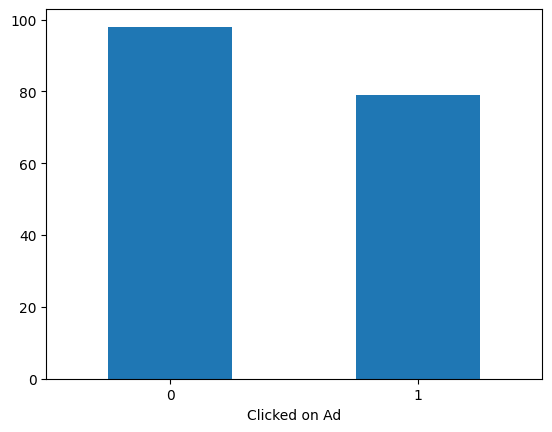

In [ ]:
# Ahora se tiene las clases balanceadas a la clase con menor frecuencia
pd.value_counts(y_train_under).plot(kind = "bar", rot = 0)

In [ ]:
# Ajustamos el modelo de Regresión Logística
lr_under = LogisticRegression()
lr_under.fit(x_train_under,y_train_under)

LogisticRegression()

In [ ]:
logit_under = sm.Logit(y_train_under, x_train_under)
model_under =logit_under.fit()
model_under.summary2()

Optimization terminated successfully.
         Current function value: 0.193614
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                 Logit              Method:             MLE       
Dependent Variable:    Clicked on Ad      Pseudo R-squared:   0.718     
Date:                  2023-12-03 13:23   AIC:                78.5395   
No. Observations:      177                BIC:                94.4203   
Df Model:              4                  Log-Likelihood:     -34.270   
Df Residuals:          172                LL-Null:            -121.67   
Converged:             1.0000             LLR p-value:        9.7954e-37
No. Iterations:        8.0000             Scale:              1.0000    
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Daily Time Spent on Site -0.0639   0.0234 -2.7294 0.0063 -0.1098 -0.0180
Age                       0.3474   0.0607  5.7267 0.0000  0.2285  0.4663
Area Income              -0.0000   0.0000 -0.6136 0.5395 -0.0001  0.0000
Daily Internet Usage     -0.0374   0.0097 -3.8350 0.0001 -0.0565 -0.0183
Male                      0.1880   0.6466  0.2907 0.7713 -1.0793  1.4552
========================================================================

"""

### Oversampling

In [ ]:
from imblearn.over_sampling import RandomOverSampler
over = RandomOverSampler(sampling_strategy= 0.8, random_state=0)

In [ ]:
x_train_over, y_train_over = over.fit_resample(x_train, y_train)

<Axes: xlabel='Clicked on Ad'>

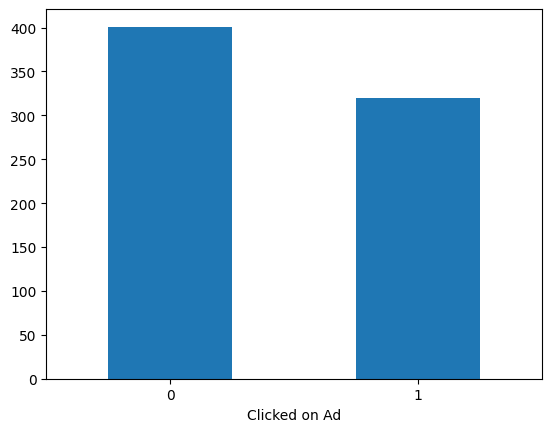

In [ ]:
# Ahora se tiene las clases balanceadas a la clase con mayor frecuencia
pd.value_counts(y_train_over).plot(kind = "bar", rot = 0)

In [ ]:
# Ajustamos el modelo de Regresión Logística
lr_over = LogisticRegression()
lr_over.fit(x_train_over, y_train_over)

LogisticRegression()

In [ ]:
logit_over = sm.Logit(y_train_over, x_train_over)
model_over =logit_over.fit()
model_over.summary2()

Optimization terminated successfully.
         Current function value: 0.256667
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                Logit              Method:             MLE        
Dependent Variable:   Clicked on Ad      Pseudo R-squared:   0.626      
Date:                 2023-12-03 13:23   AIC:                380.1135   
No. Observations:     721                BIC:                403.0167   
Df Model:             4                  Log-Likelihood:     -185.06    
Df Residuals:         716                LL-Null:            -495.20    
Converged:            1.0000             LLR p-value:        6.3046e-133
No. Iterations:       8.0000             Scale:              1.0000     
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Daily Time Spent on Site -0.0411   0.0094 -4.3567 0.0000 -0.0596 -0.0226
Age                       0.2997   0.0233 12.8586 0.0000  0.2541  0.3454
Area Income              -0.0001   0.0000 -5.8308 0.0000 -0.0001 -0.0000
Daily Internet Usage     -0.0260   0.0038 -6.7803 0.0000 -0.0335 -0.0185
Male                      0.0852   0.2694  0.3162 0.7519 -0.4428  0.6131
========================================================================

"""

### SMOTE

In [ ]:
from imblearn.combine import SMOTETomek
st = SMOTETomek(sampling_strategy= 0.8, random_state=0)

In [ ]:
x_train_st, y_train_st = st.fit_resample(x_train, y_train)

<Axes: xlabel='Clicked on Ad'>

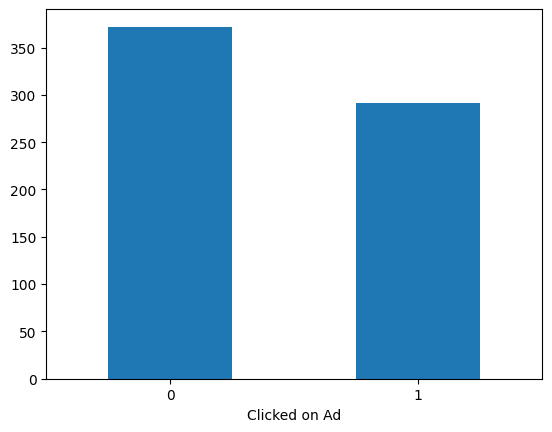

In [ ]:
# Ahora se tiene las clases balanceadas
pd.value_counts(y_train_st).plot(kind = "bar", rot = 0)

In [ ]:
# Ajustamos el modelo de Regresión Logística
lr_st = LogisticRegression()
lr_st.fit(x_train_st, y_train_st)

LogisticRegression()

In [ ]:
LogisticRegression().get_params()

{'C': 1.0,
 'class_weight': None,
 'dual': False,
 'fit_intercept': True,
 'intercept_scaling': 1,
 'l1_ratio': None,
 'max_iter': 100,
 'multi_class': 'auto',
 'n_jobs': None,
 'penalty': 'l2',
 'random_state': None,
 'solver': 'lbfgs',
 'tol': 0.0001,
 'verbose': 0,
 'warm_start': False}

In [ ]:
logit_st = sm.Logit(y_train_st, x_train_st)
model_st =logit_st.fit()
model_st.summary2()

Optimization terminated successfully.
         Current function value: 0.181699
         Iterations 8


<class 'statsmodels.iolib.summary2.Summary'>
"""
                             Results: Logit
========================================================================
Model:                Logit              Method:             MLE        
Dependent Variable:   Clicked on Ad      Pseudo R-squared:   0.735      
Date:                 2023-12-03 13:24   AIC:                250.9323   
No. Observations:     663                BIC:                273.4161   
Df Model:             4                  Log-Likelihood:     -120.47    
Df Residuals:         658                LL-Null:            -454.60    
Converged:            1.0000             LLR p-value:        2.5963e-143
No. Iterations:       8.0000             Scale:              1.0000     
------------------------------------------------------------------------
                          Coef.  Std.Err.    z    P>|z|   [0.025  0.975]
------------------------------------------------------------------------
Daily Time Spent on Site -0.0187   0.0122 -1.5323 0.1255 -0.0426  0.0052
Age                       0.3743   0.0330 11.3272 0.0000  0.3095  0.4390
Area Income              -0.0001   0.0000 -5.0664 0.0000 -0.0001 -0.0000
Daily Internet Usage     -0.0459   0.0060 -7.6648 0.0000 -0.0576 -0.0342
Male                     -1.1956   0.3861 -3.0968 0.0020 -1.9524 -0.4389
========================================================================

"""

Habiendo ajustado el modelo de regresión lineal, se tienen los siguientes resultados

- Sin Balanceo: AIC = 133.2529
- Balanceo Undersampling: AIC = 63.8057
- Balanceo Oversampling: AIC = 352.5112
- Balanceo SMOTE: AIC = 247.8671

Con ello concluimos que el mejor modelo tomando como base el **Criterio de Información de Akaike** es el que utiliza el balanceo Undersampling

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, lr_under.predict(x_test))

array([[96,  3],
       [ 1, 20]], dtype=int64)

Text(0.5, 1.0, 'Test')

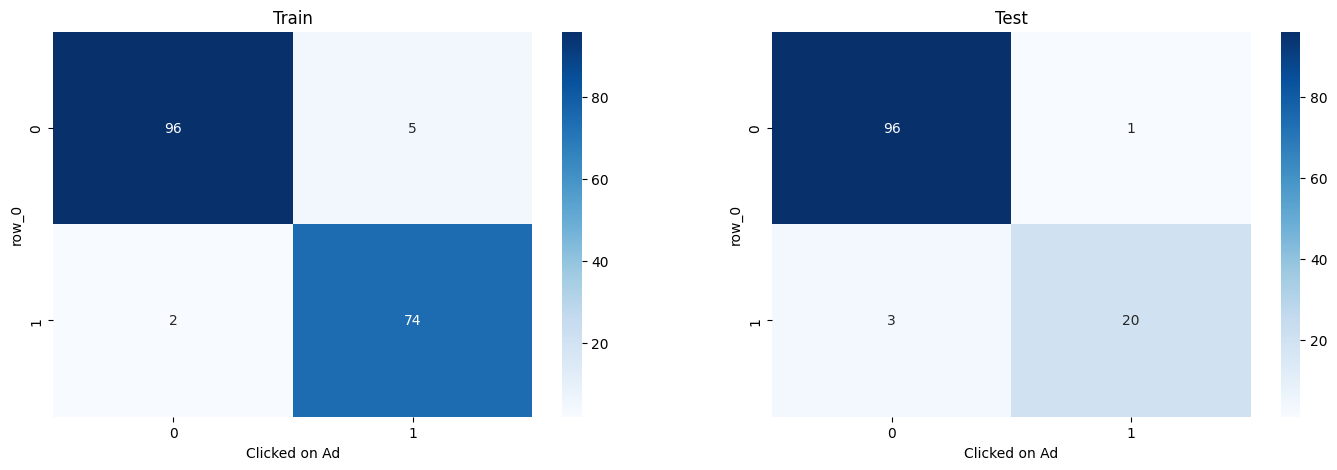

In [ ]:
matriz_confusion_train = pd.crosstab(lr_under.predict(x_train_under),y_train_under)
matriz_confusion_test = pd.crosstab(lr_under.predict(x_test),y_test)
fig = plt.figure(figsize = (17,5))
ax1 = plt.subplot(121)
sns.heatmap(matriz_confusion_train, annot = True, cmap = "Blues")
ax1.set_title("Train")
ax2 = plt.subplot(122)
sns.heatmap(matriz_confusion_test, annot = True, cmap = "Blues")
ax2.set_title("Test")

#### Calculando las métricas importantes utilizando la matriz de confusión

In [ ]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score

**Accuracy (Exactitud)**: Mide el porcentaje de casos acertados por el modelo  

In [ ]:
accuracy = np.trace(matriz_confusion_test)/matriz_confusion_test.sum().sum()
accuracy

0.9666666666666667

In [ ]:
accuracy_score(y_test, lr_under.predict(x_test))

0.9666666666666667

**Recall(Exhaustividad):** Mide la capacidad de identificación del modelo.

In [ ]:
recall = matriz_confusion_test[1][1]/matriz_confusion_test[1].sum()
recall

0.9523809523809523

In [ ]:
recall_score(y_test, lr_under.predict(x_test))

0.9523809523809523

**Precisión:**

In [ ]:
precision = matriz_confusion_test.iloc[1,1]/matriz_confusion_test.iloc[1].sum()
precision

0.8695652173913043

In [ ]:
precision_score(y_test, lr_under.predict(x_test))

0.8695652173913043

**F1 Score:** Combina las medidas de precisión y recall en un solo valor

In [ ]:
f1 = 2*precision*recall/(precision+recall)
f1

0.8076923076923077

In [ ]:
f1_score(y_test, lr_under.predict(x_test))

0.8076923076923077

In [ ]:
y_test.ravel()

array([0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

#### Reporte con todos los indicadores

In [ ]:
from sklearn.metrics import classification_report

In [ ]:
print(classification_report(y_test, lr_under.predict(x_test)))

              precision    recall  f1-score   support

           0       1.00      0.90      0.95        99
           1       0.68      1.00      0.81        21

    accuracy                           0.92       120
   macro avg       0.84      0.95      0.88       120
weighted avg       0.94      0.92      0.92       120



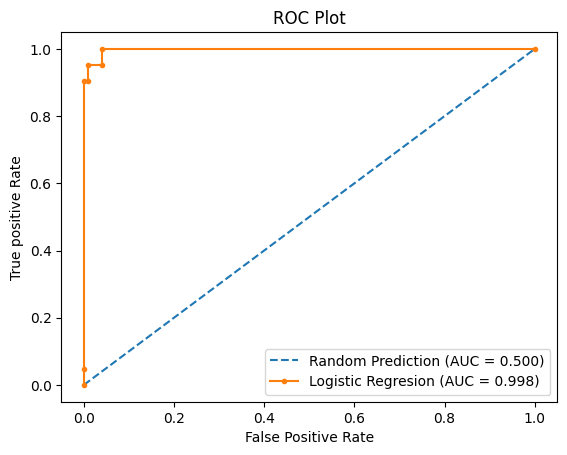

In [ ]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_auc_score

r_probs = [0 for _ in range(len(y_test))]
lr_probs = lr_under.predict_proba(x_test)[:,1]

r_auc = roc_auc_score(y_test, r_probs)
lr_auc = roc_auc_score(y_test, lr_probs)

r_fpr, r_tpr, _ = roc_curve(y_test, r_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs)

plt.plot(r_fpr, r_tpr, linestyle = "--", label = "Random Prediction (AUC = %0.3f)" % r_auc)
plt.plot(lr_fpr, lr_tpr, marker = ".", label  = "Logistic Regresion (AUC = %0.3f)" % lr_auc)
plt.title("ROC Plot")
plt.xlabel("False Positive Rate")
plt.ylabel("True positive Rate")
plt.legend()
plt.show()